In [4]:
import pandas as pd
encodings = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

file_path = "./Gungor_2018_VictorianAuthorAttribution_data.csv"
for enc in encodings:
    try:
        data = pd.read_csv(file_path, encoding='latin1')
        print(f"Successfully read data with encoding: {enc}")
        print(data.head())
        break
    except UnicodeDecodeError:
        print(f"Failed to read data with encoding: {enc}")

data

Successfully read data with encoding: utf-8
                                                text  author
0  ou have time to listen i will give you the ent...       1
1  wish for solitude he was twenty years of age a...       1
2  and the skirt blew in perfect freedom about th...       1
3  of san and the rows of shops opposite impresse...       1
4  an hour s walk was as tiresome as three in a s...       1


,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1
...,...,...
53673,after surrounding and searching the whole plac...,50
53674,giant who could make a young earthquake or a w...,50
53675,waters of the lake at the bottom of the hill c...,50
53676,fingers and thumb in it exactly as it came out...,50


In [19]:
print(len(data))

53678


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data['text']
y = data['author']

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data, transform the testing data
X_counts = vectorizer.fit_transform(X)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_counts, y)

/home/nick/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
print(X[0])

ou have time to listen i will give you the entire story he said it may form the basis of a future novel and prove quite as interesting as one of your own invention i had the time to listen of course one has time for anything and everything agreeable in the best place to hear the tale was in a victoria and with my good on the box with the coachman we set out at once on a drive to the as the recital was only half through when we reached the house we postponed the remainder while we stopped there for an excellent lunch on the way back to my friend continued and finished the story it was indeed quite suitable for use and i told my friend with thanks that i should at once put it in shape for my readers i said i should make a few alterations in it for the sake of dramatic interest but in the main would follow the lines he had given me it would spoil my romance were i to answer on this page the question that must be uppermost in the reader s mind i have already revealed almost too much of the

In [12]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_
class_index = list(model.classes_).index(1)
class_coefficients = coefficients[class_index]
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': class_coefficients
})

coef_df = coef_df.sort_values(by='coefficient', ascending=False)

# Note: not zero-indexed, indexes range from 1 to 50.
print(coef_df.head(10))  # Top positive features for author 1
print(coef_df.tail(10))  # Top negative features for author 1


       feature  coefficient
9692      when     0.407257
1915     could     0.286801
9958     young     0.264865
3768      girl     0.257645
8835     there     0.243988
6001       one     0.196503
9753      will     0.194405
396   anything     0.184284
1197      came     0.180488
8535     sugar     0.179928
      feature  coefficient
6032       or    -0.185587
2577      don    -0.189930
750        be    -0.196319
7977      sir    -0.198307
5870      now    -0.205443
4187  himself    -0.205741
9707    which    -0.207753
1169       by    -0.241430
1158      but    -0.284698
8087       so    -0.353797


In [13]:
other_coefficients = coefficients.mean(axis=0)
coef_df['mean_other_coefficients'] = other_coefficients
coef_df['difference'] = coef_df['coefficient'] - coef_df['mean_other_coefficients']

coef_df = coef_df.sort_values(by='difference', ascending=False)

print("Top features FOR author compared to all others:")
print(coef_df.head(10))

print("Top features AGAINST author compared to all others:")
print(coef_df.tail(10))


Top features for author compared to all others:
       feature  coefficient  mean_other_coefficients  difference
9692      when     0.407257            -6.206455e-17    0.407257
1915     could     0.286801             1.376455e-17    0.286801
9958     young     0.264865             3.074315e-18    0.264865
3768      girl     0.257645            -4.818676e-20    0.257645
8835     there     0.243988            -1.092876e-17    0.243988
6001       one     0.196503             7.228014e-19    0.196503
9753      will     0.194405            -2.154912e-17    0.194405
396   anything     0.184284             4.317534e-18    0.184284
1197      came     0.180488             2.322602e-18    0.180488
8535     sugar     0.179928             1.503427e-18    0.179928
Top features against author compared to all others:
      feature  coefficient  mean_other_coefficients  difference
6032       or    -0.185587             5.281269e-18   -0.185587
2577      don    -0.189930            -6.333668e-17   -0.

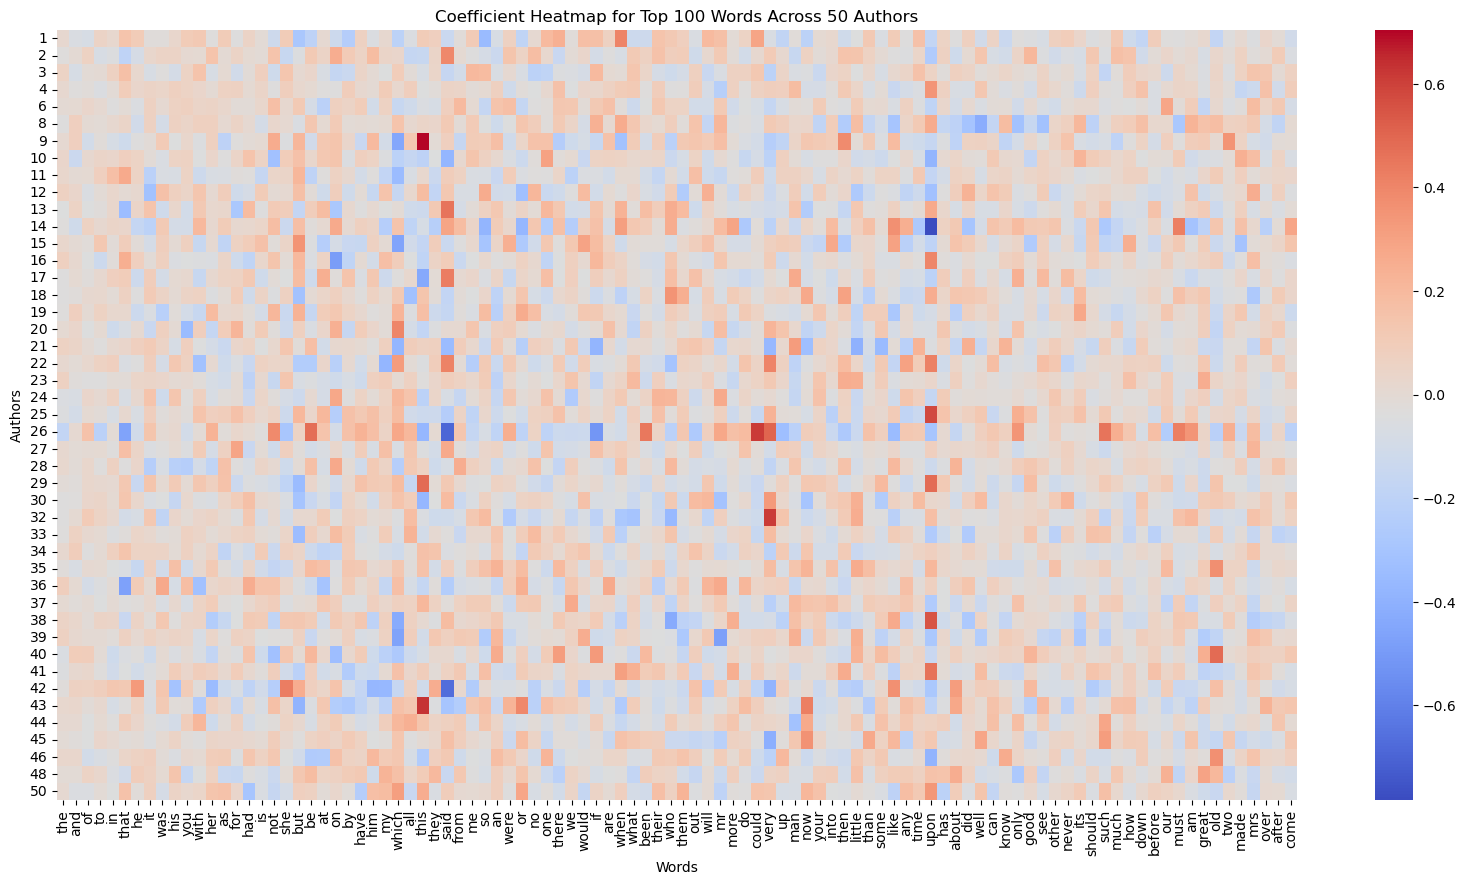

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

feature_names = vectorizer.get_feature_names_out()

word_freq = np.asarray(X_train_counts.sum(axis=0)).flatten()

word_freq_df = pd.DataFrame({
    'word': feature_names,
    'frequency': word_freq
})

top_words = word_freq_df.nlargest(100, 'frequency')['word'].tolist()
coefficients = model.coef_

top_word_indices = [vectorizer.vocabulary_[word] for word in top_words]
coeff_matrix = coefficients[:, top_word_indices]

coef_df = pd.DataFrame(coeff_matrix, columns=top_words, index=model.classes_)

plt.figure(figsize=(20, 10))
sns.heatmap(coef_df, cmap="coolwarm", xticklabels=top_words, yticklabels=model.classes_)
plt.title("Coefficient Heatmap for Top 100 Words Per Author")
plt.xlabel("Words")
plt.ylabel("Authors")
plt.show()


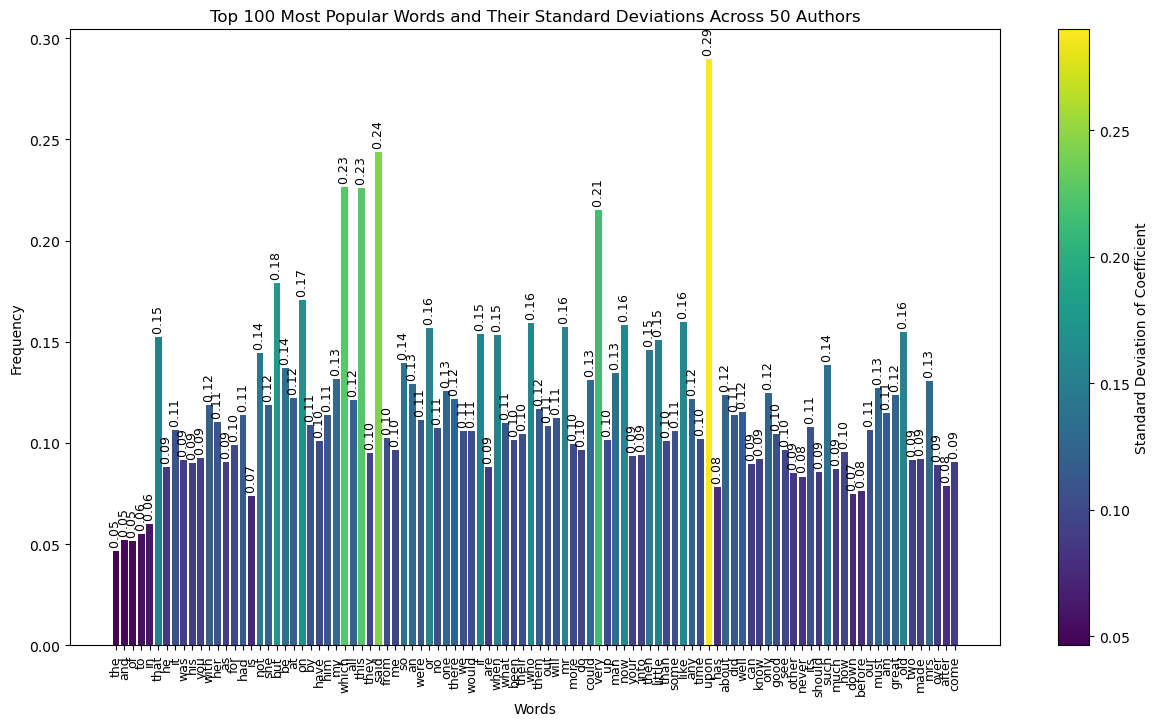

In [26]:
from matplotlib.colors import Normalize


top_words_df = word_freq_df.nlargest(100, 'frequency')
top_word_coefs = coefficients[:, top_word_indices]


std_devs = np.std(top_word_coefs, axis=0)

# Add the standard deviations to the DataFrame
top_words_df['std_dev'] = std_devs

# Plot the bar chart
plt.figure(figsize=(15, 8))
norm = Normalize(vmin=min(top_words_df['std_dev']), vmax=max(top_words_df['std_dev']))
bars = plt.bar(top_words_df['word'], top_words_df['std_dev'], color=sns.color_palette("viridis", as_cmap=True)(norm(top_words_df['std_dev'])))

for bar, std in zip(bars, top_words_df['std_dev']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f' {std:.2f} ', ha='center', va='bottom', rotation=90, size=9)

# Set the colorbar
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=min(top_words_df['std_dev']), vmax=max(top_words_df['std_dev'])))
sm.set_array([])
plt.colorbar(sm, label='Standard Deviation of Coefficient')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 100 Most Popular Words and Their Standard Deviations Across Entire Corpus')
plt.xticks(rotation=90, size=9)
plt.show()


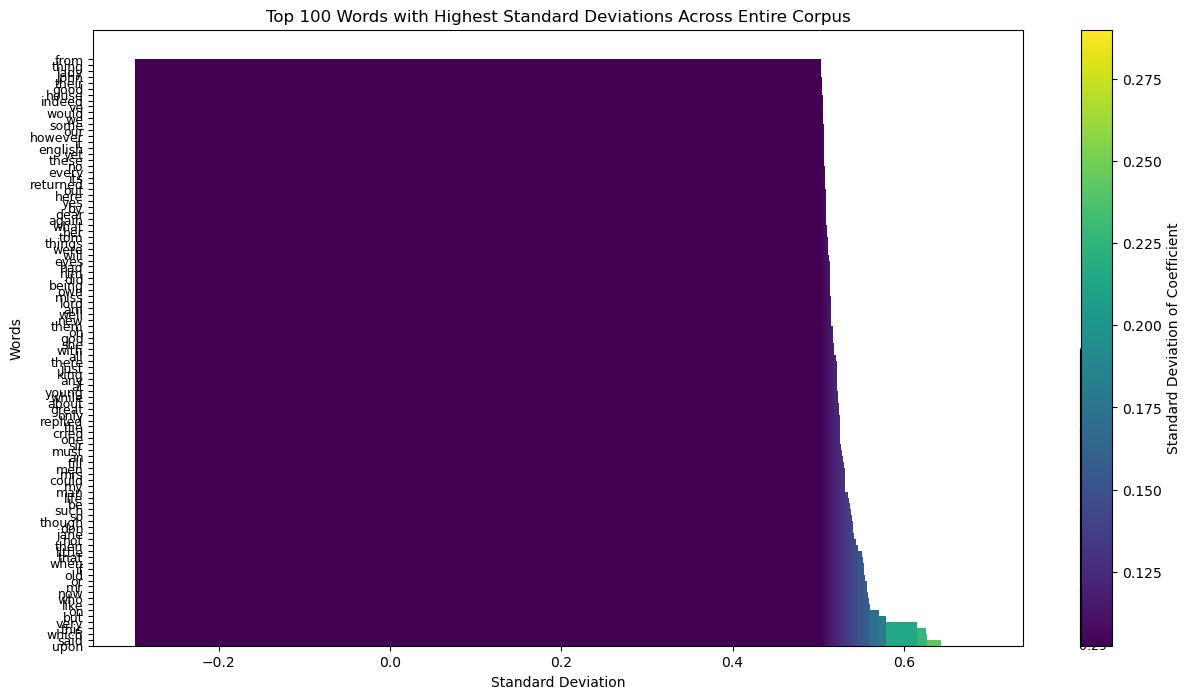

In [51]:
feature_names = vectorizer.get_feature_names_out()
all_coefficients = model.coef_

std_devs = np.std(all_coefficients, axis=0)

std_dev_df = pd.DataFrame({
    'word': feature_names,
    'std_dev': std_devs
})

top_std_dev_df = std_dev_df.nlargest(100, 'std_dev')

norm = Normalize(vmin=top_std_dev_df['std_dev'].min(), vmax=top_std_dev_df['std_dev'].max())

# plt.figure(figsize=(15, 8))
# bars = plt.barh(top_std_dev_df['word'], top_std_dev_df['std_dev'], color=sns.color_palette("viridis", as_cmap=True)(norm(top_std_dev_df['std_dev'])))

# for bar, std in zip(bars, top_std_dev_df['std_dev']):
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f' {std:.2f}', ha='center', va='bottom', size=9, rotation=90)

# sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
# sm.set_array([])
# plt.colorbar(sm, label='Standard Deviation of Coefficient')

# plt.xticks(rotation=90, ha='right', size=9)
# plt.xlabel('Words')
# plt.ylabel('Standard Deviation')
# plt.title('Top 100 Words with Highest Standard Deviations Across Entire Corpus')
# plt.show()

plt.figure(figsize=(15, 8))
bars = plt.bar(top_std_dev_df['std_dev'], top_std_dev_df['word'], color=sns.color_palette("viridis", as_cmap=True)(norm(top_std_dev_df['std_dev'])))

for bar, std in zip(bars, top_std_dev_df['std_dev']):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f' {std:.2f}', ha='left', va='center', size=9, rotation=0)

sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Standard Deviation of Coefficient')

plt.yticks(rotation=0, ha='right', size=9)
plt.ylabel('Words')
plt.xlabel('Standard Deviation')
plt.title('Top 100 Words with Highest Standard Deviations Across Entire Corpus')
plt.show()

# plt.figure(figsize=(8, 15))  # Swap the width and height of the figure
# bars = plt.barh(top_std_dev_df.index, top_std_dev_df['std_dev'], color=sns.color_palette("viridis", as_cmap=True)(norm(top_std_dev_df['std_dev'])))  # Use barh for horizontal bars

# for bar, std in zip(bars, top_std_dev_df['std_dev']):
#     height = bar.get_height()  # Get the height of the bar instead of width
#     plt.text(bar.get_x() + bar.get_width() / 2, height, f' {std:.2f}', ha='center', va='bottom', size=9, rotation=0)  # Adjust the text position and alignment

# sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
# sm.set_array([])
# plt.colorbar(sm, label='Standard Deviation of Coefficient')

# plt.yticks(top_std_dev_df.index, top_std_dev_df['word'], ha='right', va='center', rotation=0, size=9)  # Rotate the y-ticks and labels to horizontal
# plt.xlabel('Standard Deviation')
# plt.ylabel('Words')
# plt.title('Top 100 Words with Highest Standard Deviations Across Entire Corpus', y=1.02)  # Adjust the title position

# plt.tight_layout()
# plt.show()

In [32]:
len(all_coefficients)

45

In [33]:
print(top_words_df)

       word  frequency   std_dev
8819    the    2513907  0.046502
346     and    1520464  0.052043
5960     of    1427365  0.051749
8983     to    1238298  0.055168
4464     in     767174  0.059867
...     ...        ...       ...
5285   made      53407  0.092045
5668    mrs      53314  0.130810
6095   over      52969  0.089044
215   after      52267  0.078835
1573   come      52100  0.090537

[100 rows x 3 columns]


In [43]:
words_only_in_top_words = set(top_words_df['word']) - set(top_std_dev_df['word'])
words_only_in_top_std_dev = set(top_std_dev_df['word']) - set(top_words_df['word'])

print("Words only in top_words_df:", words_only_in_top_words)
print("Words only in top_std_dev_df:", words_only_in_top_std_dev)


Words only in top_words_df: {'how', 'should', 'made', 'know', 'over', 'can', 'are', 'into', 'been', 'never', 'two', 'his', 'more', 'much', 'down', 'in', 'has', 'you', 'than', 'come', 'have', 'the', 'me', 'before', 'see', 'he', 'your', 'and', 'do', 'as', 'to', 'they', 'other', 'for', 'was', 'time', 'is', 'after', 'up', 'of'}
Words only in top_std_dev_df: {'however', 'though', 'sir', 'thing', 'god', 'being', 'yes', 'while', 'dear', 'things', 'cried', 'miss', 'oh', 'new', 'young', 'house', 'john', 'don', 'indeed', 'replied', 'lady', 've', 'own', 'here', 'again', 'eyes', 'king', 'men', 'tom', 'lord', 'every', 'yet', 'english', 'till', 'these', 'tlie', 'life', 'just', 'jane', 'returned'}
